In [1]:
import time
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from cv2 import resize, INTER_CUBIC
from matplotlib.patches import Circle

from ex1_student_solution import Solution

import numpy as np

In [2]:
src_img = mpimg.imread('src.jpg')
dst_img = mpimg.imread('dst.jpg')

In [3]:
src_img.shape

(1026, 1368, 3)

In [4]:
matches = scipy.io.loadmat('matches.mat')


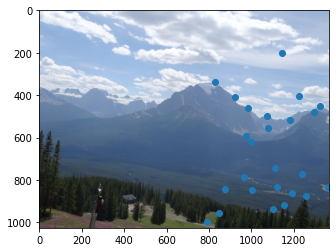

In [5]:
plt.imshow(src_img)
mp_src = matches['match_p_src']
plt.scatter(mp_src[0,:],mp_src[1,:])

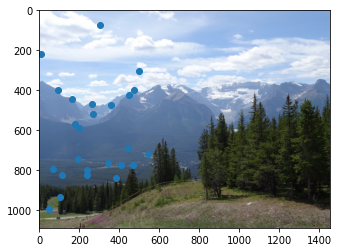

In [6]:
plt.imshow(dst_img)
mp_dst = matches['match_p_dst']
plt.scatter(mp_dst[0,:],mp_dst[1,:])

In [7]:
# mp_dst = np.array([[1,1],[1,1]])
# mp_src = np.array([[1,2],[3,4]])


In [ ]:
match_p_src = mp_src
match_p_dst = mp_dst

In [ ]:
# N = mp_src.shape[1]

# u = mp_dst[0, :]
# v = mp_dst[1, :]
# # move to homogeneous coordinates
# xy = np.transpose(np.vstack([mp_src, np.ones(N)]))

# uxy = np.multiply(np.transpose(np.array([u, ] * 3)), xy)
# vxy = np.multiply(np.transpose(np.array([v, ] * 3)), xy)
# A_u = np.concatenate((-xy, np.zeros((N, 3)), uxy), axis=1)
# A_v = np.concatenate((np.zeros((N, 3)), -xy, vxy), axis=1)

In [ ]:
N = mp_src.shape[1]

u = match_p_dst[0, :]
v = match_p_dst[1, :]
x_vec = np.vstack([match_p_src,np.ones(N)]).T
ux_vec = (x_vec.T*u).T
vx_vec = (x_vec.T*v).T
A_u = np.concatenate((x_vec, np.zeros((N, 3)), -ux_vec), axis=1)
A_v = np.concatenate((np.zeros((N, 3)), x_vec, -vx_vec), axis=1)

In [ ]:
# (x_vec.T*u).T == uxy

In [ ]:
# ux_vec == uxy

In [ ]:
# vxy.shape

In [ ]:
# A_u_doubled = np.zeros((2 * N, 9))
# A_v_doubled = np.zeros((2 * N, 9))
# for i in range(0, N):
#     A_u_doubled[2 * i] = A_u[i]
#     A_u_doubled[2 * i + 1] = A_u[i]
#     A_v_doubled[2 * i] = A_v[i]
#     A_v_doubled[2 * i + 1] = A_v[i]
# A_u_doubled[1:(2 * N):2] = 0
# A_v_doubled[0:(2 * N):2] = 0
# A = A_u_doubled + A_v_doubled

In [ ]:
A = np.concatenate([A_u,A_v])

In [ ]:
svd = np.linalg.svd(A)

In [ ]:
chosen_eigen_vector = svd[2][svd[1].argmin()]

In [ ]:
H = chosen_eigen_vector.reshape((3,3))

In [ ]:
eigen_values = svd[1]

In [ ]:
eigen_vectors = svd[2]

In [ ]:
eigen_values.sort()

In [ ]:
eigen_values.argmin()

In [ ]:
AA = np.dot(np.transpose(A), A)
_, v = np.linalg.eigh(AA)
H = v[:, 0]

In [ ]:
H = np.reshape(H, (3, 3))
# H = H / H[-1, -1]

In [ ]:
H

In [ ]:

# Parameters
max_err = 25
inliers_percent = 0.8


In [ ]:
H_naive = H

In [ ]:
xy = np.vstack([mp_src, np.ones(mp_src.shape[1])])
uv = np.vstack([mp_dst, np.ones(mp_dst.shape[1])])
estimated = np.matmul(H_naive,xy)
estimated = estimated / estimated[2,:]
error = estimated - uv
norms = np.array([np.linalg.norm(error[:2,i]) for i in range(error.shape[1])])
vfunc = np.vectorize(lambda x: x < max_err)
fit_points = vfunc(norms)
fit_percent = np.mean(fit_points)
dist_mse = np.mean(norms[fit_points])

In [ ]:
fit_percent

In [ ]:
dist_mse

####

In [ ]:
from ex1_student_solution import Solution

In [ ]:
H= Solution.compute_homography_naive(mp_src,mp_dst)

In [ ]:
H = H / H[-1][-1]

In [ ]:
H

In [ ]:
match_p_src.shape

In [ ]:
x_vec = np.vstack([match_p_src,np.ones(N)]).T


In [ ]:
pred_dst = np.dot(H,x_vec.T)

In [ ]:
pred_dst = pred_dst/pred_dst[2,:]

In [ ]:
pred_dst= pred_dst[:2,]

In [ ]:
max_err = 0
dist = pred_dst - match_p_dst
l1 =np.linalg.norm(dist,axis=0)
inline_l1 = l1[l1<max_err]
mse = np.mean(inline_l1**2) if len(inline_l1)>0 else 10 ** 9
sum(l1 < max_err)/len(l1), mse

In [ ]:
l1

In [ ]:
src.shape

In [ ]:
from main import *

In [ ]:
src_img, dst_img, match_p_src, match_p_dst = load_data()

In [ ]:
src = src_img

In [ ]:
def forward_mapping(H, src):
    """ Input : A homography matrix 3*3, src points to transfer as a 3*n array
        output: dst points as a 3*n array"""
    pts_hom = np.vstack([src, np.ones(src.shape[1])])
    f_map = H @ pts_hom
    f_map = f_map / f_map[2,:]
    return f_map

In [ ]:
def get_all_image_indices(H,src_img):
    img = np.asarray(src_img[:,:,1])
    ys , xs = np.where(img!=None)
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    xs = xs.T
    ys = ys.T
    orig_ind = np.vstack((xs,ys))
    target_ind = forward_mapping(H, orig_ind)
    target_ind = target_ind.round()
    target_ind = target_ind.astype(int)
    return orig_ind,target_ind

In [ ]:
o,t= get_all_image_indices(H,src_img)

In [ ]:
o[:,0],t[:,0]

In [ ]:
img = np.asarray(src_img[:,:,1])
ys , xs = np.where(img!=None)
xs = np.asarray(xs)
ys = np.asarray(ys)
xs = xs.T
ys = ys.T
orig_ind = np.vstack((xs,ys))
target_ind = forward_mapping(H, orig_ind)
target_ind = target_ind.round()
target_ind = target_ind.astype(int)

In [ ]:
target_ind.shape

In [ ]:
def get_corner_indx(src_img_np, H):
    rows, cols, _ = src_img_np.shape
    cor_src = np.zeros((2,4))
    cor_src[:, 0] = np.array([0,0]).T
    cor_src[:, 1] = np.array([0,rows]).T
    cor_src[:, 2] = np.array([cols,0]).T
    cor_src[:, 3] = np.array([cols,rows]).T
    print(cor_src)
    corners = forward_mapping(H, cor_src)
    xmin = math.floor(min(corners[0,:]))
    xmax = math.ceil(max(corners[0, :]))
    ymin = math.floor(min(corners[1, :]))
    ymax = math.ceil(max(corners[1, :]))
    return xmin, xmax, ymin, ymax

In [ ]:
import math

In [ ]:
orig_ind , target_ind = get_all_image_indices(H,src_img)
src_img_np = np.asarray(src_img)
rows, cols, __ = src_img_np.shape
x1, x2, y1, y2 = get_corner_indx(src_img_np,H)

In [ ]:
x_new = get_mapped_indx(target_ind,x1, width,0)


In [ ]:
size = width
i=0
ret = target_ind[i,:]


In [ ]:
x1

In [ ]:
ret

In [ ]:
ret = ret - x1


In [ ]:
ret

In [ ]:
ret = np.array([min(max(indx, 1), size) for indx in ret])

In [ ]:
ret

In [ ]:
""" Input: A homography matrix 3*3, src img  to transfer
    Output: dst image (after transformation) scaled according to destination max coordinates"""
orig_ind , target_ind = get_all_image_indices(H,src_img)
src_img_np = np.asarray(src_img)
rows, cols, __ = src_img_np.shape
x1, x2, y1, y2 = get_corner_indx(src_img_np,H)
width = x2-x1
hight = y2-y1
# target_img = np.zeros((hight+1,width+1,3))
target_img = np.zeros_like(dst_img)
def get_mapped_indx(tt, first_indx, size,i):
    ret = tt[i,:]
    ret = ret - first_indx
    ret = np.array([min(max(indx, 1), size) for indx in ret])
    return ret
x_new = get_mapped_indx(target_ind,x1, target_img.shape[0]-1,0)
y_new = get_mapped_indx(target_ind,y1, target_img.shape[1]-1,1)
x_new = x_new.astype(int)
y_new = y_new.astype(int)
target_ind = np.vstack((x_new,y_new))
for i in range(target_ind.shape[1]):
    target_img[y_new[i],x_new[i],:] = src_img_np[orig_ind[1,i],orig_ind[0,i],:]
target_img = target_img.astype(int)
plt.imshow(target_img)


In [ ]:
x_new[i]

In [ ]:
target_img.shape[0]-1

In [ ]:
target_img.shape

In [ ]:
plt.imshow(dst_img)
mp_dst = matches['match_p_dst']
plt.scatter(mp_dst[0,:],mp_dst[1,:])

In [ ]:
# !/home/dan/anaconda3/envs/cv_env/bin/python main.py

In [ ]:
!which python

In [ ]:
solution = Solution()

In [ ]:
# tt = time.time()

# # Parameters
# max_err = 25
# inliers_percent = 0.8

# fit_percent, dist_mse = solution.test_homography(H,
#                                                  match_p_src,
#                                                  match_p_dst,
#                                                  max_err)
# print('Naive Homography Test {:5.4f} sec'.format(toc(tt)))
# print([fit_percent, dist_mse])

In [ ]:
###################

In [ ]:
z= np.zeros_like(dst_img)

In [ ]:
dst_img.shape

In [ ]:
new_indexs[0][0]

In [ ]:
new_indexs[0,0] = 3

In [ ]:
new_indexs[0,0] = new_index

In [ ]:
new_indexs[0,0]

In [ ]:
H = H.T

In [ ]:
src_img.shape

In [ ]:
xv, yv = np.meshgrid(range(src_img.shape[1]), range(src_img.shape[0]), sparse=False, indexing='xy')

In [ ]:
xv.shape

In [ ]:
img = np.asarray(src_img[:,:,1])
ys , xs = np.where(img!=None)
xs = np.asarray(xs)
ys = np.asarray(ys)
xs = xs.T
ys = ys.T

In [ ]:
orig_ind = np.vstack((xs,ys))
orig_ind = np.vstack((xs,ys))
target_ind = forward_mapping(H, orig_ind)

In [ ]:
target_ind.shape

In [ ]:
aa= np.vstack([xv.flatten(),yv.flatten(),np.ones(src_img.shape[0]*src_img.shape[1])])

In [ ]:
all(yv.flatten() == ys)

In [ ]:
all(xv.flatten() == xs)

In [ ]:
dst_grid= np.dot(H,aa)

In [ ]:
aa.shape

In [ ]:
# dst_grid = dst_grid.astype('int32')

In [ ]:
# dst_grid[0,:]  = dst_grid[0,:] / dst_grid[2,:]

In [ ]:
# dst_grid[1,:]  = dst_grid[1,:] / dst_grid[2,:]

In [ ]:
dst_grid = dst_grid/dst_grid[2,:]

In [ ]:
dst_grid = dst_grid.astype('int')

In [ ]:
dst_grid[:,0]

In [ ]:
dst_grid[0,:] = dst_grid[0,:].clip(min=0,max=dst_img.shape[1]-1)
dst_grid[1,:] = dst_grid[1,:].clip(min=0,max=dst_img.shape[0]-1)

In [ ]:
dst_grid.shape

In [ ]:
aa = aa.reshape((3,src_img.shape[0],src_img.shape[1])).astype('int')

In [ ]:
dst_grid_r = dst_grid.reshape((3,src_img.shape[0],src_img.shape[1]))

In [ ]:
dst_grid_r = dst_grid_r[:2,:]
aa = aa[:2,:]

In [ ]:
new_img = np.zeros_like(dst_img)
for j in range(src_img.shape[0]):
    for i in range(src_img.shape[1]):
        c = src_img[j][i]
        new_index = dst_grid_r[:,j,i]
        new_img[new_index[1],new_index[0]] = c

In [ ]:
new_img = np.zeros_like(dst_img)

new_img[dst_grid_r[1],dst_grid_r[0]]= src_img[aa[1],aa[0]]

In [ ]:
plt.imshow(new_img)

In [ ]:
src_img.shape

In [ ]:
src_img[aa]

In [ ]:
new_inx.transpose((2,0,1,)).astype('int')

In [ ]:
np.sum(dst_grid_r != new_inx.transpose((2,0,1,)).astype('int'))

In [ ]:
new_inx.shape

In [ ]:
for k in new_inx:
    p = dst_grid_r[:,k[0],k[1]]
    h = new_inx[k]
    if p[0] != h[0] or p[1] != h[1]:
        print(k)
        break

In [ ]:
k

In [ ]:
p[1]

In [ ]:
h[1]

In [ ]:
dst_grid_r[:,100,300]

In [ ]:
src_img.shape

In [ ]:
dst_grid_r.shape

In [ ]:
new_inx.shape

In [ ]:
dst_grid_r[:,800,777]

In [ ]:
new_inx[800,777]

In [ ]:
dst_grid_r[:,:,800]

In [ ]:
new_inx[:,800]

In [ ]:
dst_grid_r[:,k[1],k[0]] == new_inx[k]

In [ ]:
plt.imshow(new_img)

In [ ]:
src_img.shape[0]

In [ ]:
dst_grid_r[0,1025,1]

In [ ]:
dst_grid_r.shape

In [ ]:
dst_grid_r.shape

In [ ]:
plg.plot()

In [ ]:
dst_grid_r[:,491,455]

In [ ]:
new_inx[(491, 455)]

In [ ]:
dst_grid_r.shape

In [ ]:
dst_grid.shape

In [ ]:
print(dst_grid[0,3000],dst_grid[0,700])

In [ ]:
dst_grid

In [ ]:
s = src_img[dst_grid[0,:],dst_grid[1,:]]

In [ ]:
src_img[(1,2),(0,0)]

In [ ]:
src_img[0][0]

In [ ]:
src_img[[1,1],[1,0]][1]

In [ ]:
s = src_img[dst_grid[0,:],dst_grid[1,:]]

In [ ]:
s= s.reshape(src_img.shape[0],src_img.shape[1],3)

In [ ]:
s.shape

In [ ]:
plt.imshow(s)

In [ ]:
np.take(a= src_img,indices=dst_grid[0,:],axis=0)

In [ ]:
src_img[dst_grid[0,:]]

In [ ]:
dst_grid[0,:].shape

In [ ]:
xv.shape

In [ ]:
xv.shape

In [ ]:
yv.shape

In [ ]:
new_inx = np.zeros((src_img.shape[0],src_img.shape[1],2))
new_img = np.zeros_like(dst_img)
for j in range(src_img.shape[0]):
    for i in range(src_img.shape[1]):
        c = src_img[j][i]
        new_index = np.dot(H,np.array([i,j,1]))
        new_index = new_index / new_index[-1]
        new_index = new_index.astype('int')
        new_index = (new_index)[:2]
        new_index[0] = max(min(new_index[0],dst_img.shape[1]-1),0)
        new_index[1] = max(min(new_index[1],dst_img.shape[0]-1),0)
        new_img[new_index[1],[new_index[0]]] = c
        new_inx[j,i] = (new_index[0],new_index[1])

In [ ]:
new_index = np.dot(H,np.array([0,0,1]))
new_index = new_index / new_index[-1]
# new_index = new_index.astype('int')
new_index

In [ ]:
new_img.shape

In [ ]:
src_img.shape

In [ ]:
H.T

In [ ]:
dst_img.shape

In [ ]:
new_img.shape

In [ ]:
plt.imshow(src_img)

In [ ]:
plt.imshow(dst_img)

In [ ]:
plt.imshow(new_img)

In [ ]:
new_img.shape

In [ ]:
min(new_index[1],dst_img.shape[1]-1)


In [ ]:
dst_img.shape[0]

In [ ]:
new_index[1]

In [ ]:
src_img.shape

In [ ]:
new_indexs

In [ ]:
new_index - origin

In [ ]:
new_index

In [ ]:
origin = np.dot(H,np.array([0,0,1]))
origin = new_index / new_index[-1]
origin = new_index.astype('int')
origin

In [ ]:
new_index

In [ ]:
new_indexs[(0,0)]

In [ ]:
new_indexs[-1][-1]

In [ ]:
plt.imshow(new_img)

In [ ]:
new_indexs = np.array(new_indexs)

In [ ]:
new_index

In [ ]:
new_indexs[0][0]

In [ ]:
get_corner_indx(src_img,H)

In [ ]:
i

In [ ]:
new_index = new_index / new_index[-1]

In [ ]:
new_index.astype('int')

In [ ]:
np.dot(H,np.array([i,j,1]))

In [ ]:
def compute_forward_homography_fast(
            homography: np.ndarray,
            src_image: np.ndarray,
            dst_image_shape: tuple = (1088, 1452, 3)) -> np.ndarray:
        """Compute a Forward-Homography in a fast approach, WITHOUT loops.

        (1) Create a meshgrid of columns and rows.
        (2) Generate a matrix of size 3x(H*W) which stores the pixel locations
        in homogeneous coordinates.
        (3) Transform the source homogeneous coordinates to the target
        homogeneous coordinates with a simple matrix multiplication and
        apply the normalization you've seen in class.
        (4) Convert the coordinates into integer values and clip them
        according to the destination image size.
        (5) Plant the pixels from the source image to the target image according
        to the coordinates you found.

        Args:
            homography: 3x3 Projective Homography matrix.
            src_image: HxWx3 source image.
            dst_image_shape: tuple of length 3 indicating the destination.
            image height, width and color dimensions.

        Returns:
            The forward homography of the source image to its destination.
        """
        # return new_image
        xv, yv = np.meshgrid(range(src_img.shape[1]), range(src_img.shape[0]), sparse=False, indexing='xy')
        grid= np.vstack([xv.flatten(),yv.flatten(),np.ones(src_img.shape[0]*src_img.shape[1])])
        dst_grid= np.dot(homography,grid)
        dst_grid = dst_grid/dst_grid[2,:]
        dst_grid = dst_grid.astype('int')
        dst_grid[0,:] = dst_grid[0,:].clip(min=0,max=dst_img.shape[1]-1)
        dst_grid[1,:] = dst_grid[1,:].clip(min=0,max=dst_img.shape[0]-1)
        grid = grid.reshape((3,src_img.shape[0],src_img.shape[1])).astype('int')
        dst_grid_r = dst_grid.reshape((3,src_img.shape[0],src_img.shape[1]))
        new_img = np.zeros_like(dst_img)
        new_img[dst_grid_r[1],dst_grid_r[0]]= src_img[grid[1],grid[0]]
        
        return new_img

In [ ]:
    def compute_forward_homography_slow(
            homography: np.ndarray,
            src_image: np.ndarray,
            dst_image_shape: tuple = (1088, 1452, 3)) -> np.ndarray:
        """Compute a Forward-Homography in the Naive approach, using loops.

        Iterate over the rows and columns of the source image, and compute
        the corresponding point in the destination image using the
        projective homography. Place each pixel value from the source image
        to its corresponding location in the destination image.
        Don't forget to round the pixel locations computed using the
        homography.

        Args:
            homography: 3x3 Projective Homography matrix.
            src_image: HxWx3 source image.
            dst_image_shape: tuple of length 3 indicating the destination
            image height, width and color dimensions.

        Returns:
            The forward homography of the source image to its destination.
        """
        # return new_image
        new_img = np.zeros_like(dst_img)
        for j in range(src_img.shape[0]):
            for i in range(src_img.shape[1]):
                c = src_img[j][i]
                new_index = np.dot(homography,np.array([i,j,1]))
                new_index = new_index / new_index[-1]
                new_index = new_index.astype('int')
                new_index = (new_index)[:2]
                new_index[0] = max(min(new_index[0],dst_img.shape[1]-1),0)
                new_index[1] = max(min(new_index[1],dst_img.shape[0]-1),0)
                new_img[new_index[1],[new_index[0]]] = c
        return new_img
    

In [ ]:
# plt.imshow(compute_forward_homography_slow(H,src_img,dst_img.shape))

In [ ]:
def test_homography(homography: np.ndarray,
                    match_p_src: np.ndarray,
                    match_p_dst: np.ndarray,
                    max_err: float) -> tuple[float, float]:
    """Calculate the quality of the projective transformation model.

    Args:
        homography: 3x3 Projective Homography matrix.
        match_p_src: 2xN points from the source image.
        match_p_dst: 2xN points from the destination image.
        max_err: A scalar that represents the maximum distance (in
        pixels) between the mapped src point to its corresponding dst
        point, in order to be considered as valid inlier.

    Returns:
        A tuple containing the following metrics to quantify the
        homography performance:
        fit_percent: The probability (between 0 and 1) validly mapped src
        points (inliers).
        dist_mse: Mean square error of the distances between validly
        mapped src points, to their corresponding dst points (only for
        inliers). In edge case where the number of inliers is zero,
        return dist_mse = 10 ** 9.
    """
    # return fit_percent, dist_mse
    x_vec = np.vstack([match_p_src,np.ones(match_p_src.shape[1])]).T
    pred_dst = np.dot(homography,x_vec.T)
    pred_dst = pred_dst/pred_dst[2,:]
    pred_dst= pred_dst[:2,]
    dist = pred_dst - match_p_dst
    l1 =np.linalg.norm(dist,axis=0)
    inline_l1 = l1[l1<max_err]
    mse = np.mean(inline_l1**2) if len(inline_l1)>0 else 10 ** 9
    return  sum(l1 < max_err)/len(l1), mse

In [ ]:



def meet_the_model_points(homography: np.ndarray,
                          match_p_src: np.ndarray,
                          match_p_dst: np.ndarray,
                          max_err: float) -> tuple[np.ndarray, np.ndarray]:
    """Return which matching points meet the homography.

    Loop through the matching points, and return the matching points from
    both images that are inliers for the given homography.

    Args:
        homography: 3x3 Projective Homography matrix.
        match_p_src: 2xN points from the source image.
        match_p_dst: 2xN points from the destination image.
        max_err: A scalar that represents the maximum distance (in
        pixels) between the mapped src point to its corresponding dst
        point, in order to be considered as valid inlier.
    Returns:
        A tuple containing two numpy nd-arrays, containing the matching
        points which meet the model (the homography). The first entry in
        the tuple is the matching points from the source image. That is a
        nd-array of size 2xD (D=the number of points which meet the model).
        The second entry is the matching points form the destination
        image (shape 2xD; D as above).
    """
    # return mp_src_meets_model, mp_dst_meets_model
    x_vec = np.vstack([match_p_src,np.ones(match_p_src.shape[1])]).T
    pred_dst = np.dot(homography,x_vec.T)
    pred_dst = pred_dst/pred_dst[2,:]
    pred_dst= pred_dst[:2,]
    dist = pred_dst - match_p_dst
    l1 =np.linalg.norm(dist,axis=0)
    return match_p_src[:,l1<max_err], match_p_dst[:,l1<max_err]

In [ ]:
homography=compute_homography_naive(match_p_src,match_p_dst)

In [ ]:
x_vec = np.vstack([match_p_src,np.ones(match_p_src.shape[1])]).T
pred_dst = np.dot(homography,x_vec.T)
pred_dst = pred_dst/pred_dst[2,:]
pred_dst= pred_dst[:2,]
dist = pred_dst - match_p_dst
l1 =np.linalg.norm(dist,axis=0)

In [ ]:
l1

In [ ]:
 def compute_homography_naive(match_p_src: np.ndarray,
                                 match_p_dst: np.ndarray) -> np.ndarray:
        """Compute a Homography in the Naive approach, using SVD decomposition.

        Args:
            match_p_src: 2xN points from the source image.
            match_p_dst: 2xN points from the destination image.

        Returns:
            Homography from source to destination, 3x3 numpy array.
        """
        # return homography
        N = match_p_src.shape[1]
        u = match_p_dst[0, :]
        v = match_p_dst[1, :]
        x_vec = np.vstack([match_p_src,np.ones(N)]).T
        ux_vec = (x_vec.T*u).T
        vx_vec = (x_vec.T*v).T
        A_u = np.concatenate((x_vec, np.zeros((N, 3)), -ux_vec), axis=1)
        A_v = np.concatenate((np.zeros((N, 3)), x_vec, -vx_vec), axis=1)
        A = np.concatenate([A_u,A_v])
        svd = np.linalg.svd(A)
        chosen_eigen_vector = svd[2][svd[1].argmin()]
        return chosen_eigen_vector.reshape((3,3))

In [ ]:
w = inliers_percent
# t = max_err
# p = parameter determining the probability of the algorithm to
# succeed
p = 0.99
# the minimal probability of points which meets with the model
d = 0.5
# number of points sufficient to compute the model
n = 4
# number of RANSAC iterations (+1 to avoid the case where w=1)
k = int(np.ceil(np.log(1 - p) / np.log(1 - w ** n))) + 1

In [ ]:
best_mse = np.inf
for i in range(k):
    r_c_points = np.random.choice(range(match_p_src.shape[1]),size=n,replace=False)
    H = Solution.compute_homography_naive(match_p_src[:,r_c_points],match_p_dst[:,r_c_points])
    in_prob,mse= Solution.test_homography(H,match_p_src,match_p_dst,max_err)
    if in_prob > d:
        if mse < best_mse:
            best_mse=mse
            meet_points = Solution.meet_the_model_points(H,match_p_src,match_p_dst,max_err)
            best_model = Solution.compute_homography_naive(*meet_points)

print(best_mse)

In [ ]:

# Parameters
max_err = 25
inliers_percent = 0.8


In [ ]:
matches = scipy.io.loadmat('matches.mat')
match_p_src = matches['match_p_src']
match_p_dst = matches['match_p_dst']


In [ ]:
import ex1_student_solution

In [ ]:
import importlib

In [ ]:
importlib.reload(ex1_student_solution)

In [ ]:
s=ex1_student_solution.Solution()

In [ ]:
h = s.compute_homography(match_p_src=match_p_src,match_p_dst=match_p_dst,inliers_percent=inliers_percent,max_err=max_err)

In [ ]:
i = ex1_student_solution.Solution.compute_forward_homography_fast(best_model,src_img,dst_img.shape)

In [ ]:
plt.imshow(i)

In [ ]:
plt.imshow(i)

In [ ]:
xy = np.vstack([match_p_src, np.ones(match_p_src.shape[1])])
uv = np.vstack([match_p_dst, np.ones(match_p_dst.shape[1])])
estimated = np.matmul(compute_homography_naive(match_p_src,match_p_dst),xy)
estimated = estimated / estimated[2,:]
error = estimated - uv
norms = np.array([np.linalg.norm(error[:2,i]) for i in range(error.shape[1])])
vfunc = np.vectorize(lambda x: x < max_err)
fit_points = vfunc(norms)
fit_percent = np.mean(fit_points)
dist_mse = np.mean(norms[fit_points])
print( fit_percent, dist_mse)

In [ ]:
test_homography(compute_homography_naive(match_p_src,match_p_dst),match_p_src,match_p_dst,max_err=max_err)

In [ ]:
compute_homography_naive(*meet_points)

In [ ]:
meet_points

In [ ]:
max_err

In [ ]:
r_c_points

In [ ]:
fit_percent_terget = 0.7
n = mp_src.shape[1]
p = 0.999
k = int(np.ceil(np.log(1 - p) / np.log(1 - inliers_percent ** 4)))
best_mse = np.inf
opt_mse = np.inf
for i in range(k):
    indx_points = np.random.randint(1, n, 4)
    H_naive = compute_homography_naive(mp_src[:, indx_points], mp_dst[:, indx_points])
    fit_percent,aaa = test_homography(H_naive, mp_src, mp_dst, max_err)
    xy = np.vstack([mp_src, np.ones(mp_src.shape[1])])
    uv = np.vstack([mp_dst, np.ones(mp_dst.shape[1])])
    estimated = np.matmul(H_naive, xy)
    estimated = estimated / estimated[2, :]
    error = estimated - uv
    norms = np.array([np.linalg.norm(error[:2, i]) for i in range(error.shape[1])])
    vfunc = np.vectorize(lambda x: x < max_err)
    fit_points = vfunc(norms)
    print(fit_points.shape)
    H_naive_all_points = compute_homography_naive(mp_src[:, fit_points],mp_dst[:, fit_points])
    _, dist_mse_all_point = test_homography(H_naive, mp_src[:, fit_points],\
                                                mp_dst[:, fit_points], max_err)
    if dist_mse_all_point < best_mse:
        if dist_mse_all_point < opt_mse:
            H_opt = H_naive_all_points
            opt_mse = dist_mse_all_point

        if fit_percent > fit_percent_terget:
            best_H = H_naive_all_points
            best_mse = dist_mse_all_point
try:
    best_H
except:
    print('there is no good H for these points under the conditions required')
  

In [ ]:
svd[2][svd[1].argmin()]

In [ ]:
chosen_eigen_vector = svd[2][svd[1].argmin()]

In [ ]:
import numpy as np
import itertools

max_err = 25

# _, _, match_p_src, match_p_dst = load_data(is_perfect_matches=True)

inliers_ratio = []

# matches = scipy.io.loadmat('matches_perfect.mat')

for indices in itertools.combinations(range(match_p_src.shape[1]), 4):
    h = Solution.compute_homography_naive(match_p_src[:,list(indices)], match_p_dst[:,list(indices)])

    dist = Solution.test_homography(h, match_p_src, match_p_dst,
                                                                                  max_err)
    mp_src_meets_model, mp_dst_meets_model = Solution.meet_the_model_points(h, match_p_src, match_p_dst,
                                                                                  max_err)

    inliers_ratio.append(mp_src_meets_model.shape[1] / match_p_src.shape[1])

acceptance_probability = (np.array(inliers_ratio) >= 0.5).mean()
print(acceptance_probability)

In [ ]:
import numpy as np
import itertools
import cv2

max_err = 25

# _, _, match_p_src, match_p_dst = load_data(is_perfect_matches=True)

inliers_ratio = []

for indices in itertools.combinations(range(match_p_src.shape[1]), 4):
    h, status = cv2.findHomography(match_p_src.T[list(indices)], match_p_dst.T[list(indices)])
    h1 = compute_homography_naive(match_p_src[:,list(indices)], match_p_dst[:,list(indices)])
    dist = Solution.test_homography(h, match_p_src, match_p_dst,
                                                                                  max_err)
    mp_src_meets_model, mp_dst_meets_model = Solution.meet_the_model_points(h, match_p_src, match_p_dst,
                                                                                  max_err)

    inliers_ratio.append(mp_src_meets_model.shape[1] / match_p_src.shape[1])
    
acceptance_probability = (np.array(inliers_ratio) >= 0.5).mean()
print(acceptance_probability)

In [ ]:
acceptance_probability

In [ ]:
from ex1_student_solution import Solution

In [ ]:
matches = scipy.io.loadmat('matches.mat')
match_p_src = matches['match_p_src']
match_p_dst = matches['match_p_dst']


In [ ]:
h=Solution.compute_homography_naive(match_p_src[:,:4],match_p_dst[:,:4])
h /h[-1][-1]

In [ ]:
import cv2
cv2.findHomography(match_p_src[:,:].T,match_p_dst[:,:].T)[0]

In [ ]:
h2 = compute_homography_naive1(match_p_src[:,list(indices)], match_p_dst[:,list(indices)])
h1 = compute_homography_naive(match_p_src[:,list(indices)], match_p_dst[:,list(indices)])
# h, status = cv2.findHomography(match_p_src.T[list(indices)], match_p_dst.T[list(indices)])


In [ ]:
h2

In [ ]:

def compute_homography_naive1(mp_src, mp_dst):
    N = mp_src.shape[1]
    u = mp_dst[0, :]
    v = mp_dst[1, :]
    # move to homogeneous coordinates
    xy = np.transpose(np.vstack([mp_src, np.ones(N)]))

    uxy = np.multiply(np.transpose(np.array([u, ] * 3)), xy)
    vxy = np.multiply(np.transpose(np.array([v, ] * 3)), xy)
    A_u = np.concatenate((-xy, np.zeros((N, 3)), uxy), axis=1)
    A_v = np.concatenate((np.zeros((N, 3)), -xy, vxy), axis=1)
    A_u_doubled = np.zeros((2 * N, 9))
    A_v_doubled = np.zeros((2 * N, 9))
#     for i in range(0, N):
#         A_u_doubled[2 * i] = A_u[i]
#         A_u_doubled[2 * i + 1] = A_u[i]
#         A_v_doubled[2 * i] = A_v[i]
#         A_v_doubled[2 * i + 1] = A_v[i]

#     A_u_doubled[1:(2 * N):2] = 0
#     A_v_doubled[0:(2 * N):2] = 0
    
    A_u_doubled = np.concatenate((xy, np.zeros((N, 3)), -uxy), axis=1)
    A_v_doubled = np.concatenate((np.zeros((N, 3)), xy, -vxy), axis=1)
    
    A = np.concatenate([A_u_doubled,A_v_doubled])
    #A_u_doubled + A_v_doubled

    AtA = np.dot(np.transpose(A), A)
    e , v = np.linalg.eigh(AtA)
    
#     print(np.linalg.norm(v[0]))

    svd = np.linalg.svd(A)
    print(svd[1][-1])
    print(np.argmin(svd[1]))
    print(svd[1][np.argmin(svd[1])])
    print(svd[1][-1])
    
    v = svd[2][np.argmin(svd[1])]
#     print(np.min(svd[1]**2))
#     print(np.min(e))
#     print(np.linalg.norm(v))
    H = v 
    H = np.reshape(H, (3, 3))
    H = H / H[-1, -1]
    return H

In [ ]:
N = mp_src.shape[1]
u = mp_dst[0, :]
v = mp_dst[1, :]
# move to homogeneous coordinates
xy = np.transpose(np.vstack([mp_src, np.ones(N)]))

uxy = np.multiply(np.transpose(np.array([u, ] * 3)), xy)
vxy = np.multiply(np.transpose(np.array([v, ] * 3)), xy)
A_u = np.concatenate((-xy, np.zeros((N, 3)), uxy), axis=1)
A_v = np.concatenate((np.zeros((N, 3)), -xy, vxy), axis=1)
A_u_doubled = np.zeros((2 * N, 9))
A_v_doubled = np.zeros((2 * N, 9))
#     for i in range(0, N):
#         A_u_doubled[2 * i] = A_u[i]
#         A_u_doubled[2 * i + 1] = A_u[i]
#         A_v_doubled[2 * i] = A_v[i]
#         A_v_doubled[2 * i + 1] = A_v[i]

#     A_u_doubled[1:(2 * N):2] = 0
#     A_v_doubled[0:(2 * N):2] = 0

A_u_doubled = np.concatenate((xy, np.zeros((N, 3)), -uxy), axis=1)
A_v_doubled = np.concatenate((np.zeros((N, 3)), xy, -vxy), axis=1)

A = np.concatenate([A_u_doubled,A_v_doubled])
#A_u_doubled + A_v_doubled

AtA = np.dot(np.transpose(A), A)
e , v = np.linalg.eigh(AtA)

#     print(np.linalg.norm(v[0]))

svd = np.linalg.svd(A)
v = svd[2][svd[1].argmin()]
#     print(np.min(svd[1]**2))
#     print(np.min(e))
print(np.linalg.norm(v))
H = v 
H = np.reshape(H, (3, 3))
H = H / H[-1, -1]

In [ ]:
svd = np.linalg.svd(A)


In [ ]:
svd[1][-1]

In [ ]:
svd[1][np.argmin(svd[1])]

In [ ]:
np.argmin(svd[1])

In [ ]:
svd[2][-1]

In [ ]:
v[0]

In [ ]:
np.argmin(svd[1])

In [ ]:
(min(svd[1])**2)

In [ ]:
v[0]

In [ ]:
[U, S, Vt] = np.linalg.svd(A)

In [ ]:
svd[2][0]

In [ ]:
Vt[-1]

In [ ]:
len(svd[1])

In [ ]:
np.argmin(e)

In [ ]:
e , v = np.linalg.eigh(AtA)


In [ ]:
def compute_homography_naive(match_p_src: np.ndarray,
                             match_p_dst: np.ndarray) -> np.ndarray:
    """Compute a Homography in the Naive approach, using SVD decomposition.

    Args:
        match_p_src: 2xN points from the source image.
        match_p_dst: 2xN points from the destination image.

    Returns:
        Homography from source to destination, 3x3 numpy array.
    """
    # return homography
    N = match_p_src.shape[1]
    u = match_p_dst[0, :]
    v = match_p_dst[1, :]
    x_vec = np.vstack([match_p_src,np.ones(N)]).T
    ux_vec = (x_vec.T*u).T
    vx_vec = (x_vec.T*v).T
    A_u = np.concatenate((x_vec, np.zeros((N, 3)), -ux_vec), axis=1)
    A_v = np.concatenate((np.zeros((N, 3)), x_vec, -vx_vec), axis=1)
    A = np.concatenate([A_u,A_v])
    svd = np.linalg.svd(A)
#     print(svd[1])
    chosen_eigen_vector = svd[2][-1]
    h = chosen_eigen_vector.reshape((3,3))
    return  h / h[-1,-1]

In [ ]:
################

In [20]:
backward_projective_homography = np.linalg.inv(h)

In [21]:
src_image = dst_img
homography = backward_projective_homography
dst_image_shape = src_image.shape

In [22]:
src_img.shape

(1026, 1368, 3)

In [157]:
def homography_apply(homography,src_image,dst_image_shape ):
    xv, yv = np.meshgrid(range(dst_image_shape[1]), range(dst_image_shape[0]), sparse=False, indexing='xy')
    grid= np.vstack([xv.flatten(),yv.flatten(),np.ones(dst_image_shape[0]*dst_image_shape[1])])
    dst_grid= np.dot(homography,grid)
    dst_grid = dst_grid/dst_grid[2,:]
    dst_grid = dst_grid.astype('int')
#     dst_grid[0,:] = dst_grid[0,:].clip(min=0,max=dst_image_shape[1]-1)
#     dst_grid[1,:] = dst_grid[1,:].clip(min=0,max=dst_image_shape[0]-1)
    grid = grid.reshape((3,dst_image_shape[0],dst_image_shape[1])).astype('int')
    dst_grid_r = dst_grid.reshape((3,dst_image_shape[0],dst_image_shape[1]))
    return dst_grid_r

In [119]:
xv, yv = np.meshgrid(range(dst_image_shape[1]), range(dst_image_shape[0]), sparse=False, indexing='xy')
grid= np.vstack([xv.flatten(),yv.flatten(),np.ones(dst_image_shape[0]*dst_image_shape[1])])
dst_grid= np.dot(homography,grid)
dst_grid = dst_grid/dst_grid[2,:]
dst_grid = dst_grid.astype('int')
# dst_grid[0,:] = dst_grid[0,:].clip(min=0,max=dst_image_shape[1]-1)
# dst_grid[1,:] = dst_grid[1,:].clip(min=0,max=dst_image_shape[0]-1)
grid = grid.reshape((3,dst_image_shape[0],dst_image_shape[1])).astype('int')
dst_grid_r = dst_grid.reshape((3,dst_image_shape[0],dst_image_shape[1]))

In [25]:
w= (dst_grid[0,:] >0)&(dst_grid[1,:] >0)

In [26]:
w.shape

(1579776,)

In [27]:
dst_grid1 = dst_grid[1,:][w]
dst_grid0 = dst_grid[0,:][w]

In [28]:
dst_grid_r.shape

(3, 1088, 1452)

In [29]:
dst_grid.shape

(3, 1579776)

In [125]:
def bilinear(im,xv_s,xv_d,yv_s,yv_d):
    ix = xv_s.flatten()
    iy = yv_s.flatten()
    samples = im[iy,ix]
    int_im = griddata((iy, ix), samples, (xv_d, yv_d),method='linear')
    return int_im

In [31]:
xv_s.shape

NameError: name 'xv_s' is not defined

In [32]:
src_img.shape

(1026, 1368, 3)

In [280]:
grid.shape

(3, 1306, 2726)

In [291]:
src_img[yv_s,xv_s].shape

(1026, 1368, 3)

In [289]:
src_img.shape

(1026, 1368, 3)

In [266]:
xv_s.shape

(1026, 1368)

In [ ]:
homography=h

In [158]:
dst_grid_r = homography_apply(translated_back_h,src_img,(r,c,1) )

In [160]:
xv_d,yv_d = dst_grid_r[1],dst_grid_r[0]

In [128]:
dst_grid.shape

(3, 1579776)

In [129]:
xv_s.shape

(1026, 1368)

In [153]:
xv_s, yv_s = np.meshgrid(range(src_img.shape[1]), range(src_img.shape[0]), sparse=False, indexing='xy')
grid= np.vstack([xv.flatten(),yv.flatten(),np.ones(dst_image_shape[0]*dst_image_shape[1])])

In [131]:
from scipy.interpolate import griddata

In [132]:
import time

In [133]:
xv_d.flatten()

array([   3,    3,    3, ..., 1733, 1734, 1734])

In [134]:
yv_d.flatten()

array([ 889,  890,  891, ..., 2826, 2828, 2830])

In [135]:
src_img[:,:,0].shape

(1026, 1368)

In [136]:
xv_d,yv_d = dst_grid[1],dst_grid[0]

In [154]:
xv_d.shape

(1306, 2726)

In [161]:
t = time.time()
int_im = bilinear(src_img, xv_s, xv_d, yv_s, yv_d)
print(time.time()-t)

24.362380027770996


In [162]:
int_im.shape

(1306, 2726, 3)

In [140]:
1088*1452*3

4739328

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


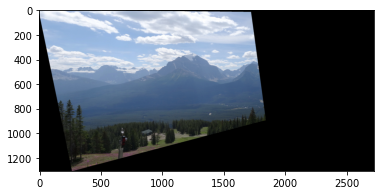

In [164]:
plt.imshow(int_im.astype('int'))

In [83]:
w = (xv_d==0)|(yv_d==0)

In [84]:
w = np.stack([w,w,w])

In [85]:
w.shape

(3, 1306, 2726)

In [93]:
(int_im*w.transpose(1,2,0)).shape

(1306, 2726, 3)

In [314]:
yv_d.shape

(1306, 2726)

In [188]:
dst_img.shape

(1088, 1452, 3)

In [189]:
yv_d.shape

(1306, 2726)

In [190]:
int_im.shape

(1306, 2726, 3)

In [199]:
int_im[-1,0]

array([17., 17., 17.])

In [99]:
int_im=np.nan_to_num(int_im,0)

In [101]:
int_im

array([[[244., 247., 254.],
        [244., 247., 254.],
        [245., 248., 255.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[244., 247., 254.],
        [244., 247., 254.],
        [244., 247., 254.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[244., 247., 254.],
        [244., 247., 254.],
        [244., 247., 254.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[ 18.,  18.,  18.],
        [ 17.,  17.,  17.],
        [ 17.,  17.,  17.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 17.,  17.,  17.],
        [ 17.,  17.,  17.],
        [ 17.,  17.,  17.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 17.,  17.,  17.],
        [ 17.,  17.,  17.],
        [ 17.,  

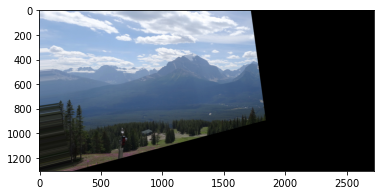

In [100]:
plt.imshow(int_im.astype('int'))

In [ ]:
plt.imshow(int_im.astype('int'))

In [ ]:
s.find_panorama_shape(src_img,dst_img,best_model)

In [ ]:
src_img.shape

In [ ]:
dst_img.shape

In [ ]:
backward_homography,pad_left,pad_up= backward_projective_homography,300,400

In [ ]:
trans_mat = np.vstack([[1,0,pad_left],[0,1,pad_up],[0,0,1]])

In [ ]:
backward_homography.shape

In [ ]:
trans_mat

In [ ]:
backward_projective_homography = backward_projective_homography / np.linalg.norm(backward_projective_homography)

In [ ]:
np.linalg.norm(backward_projective_homography)

In [ ]:
backward_projective_homography.shape

In [ ]:
n = backward_projective_homography @ trans_mat

In [ ]:
n.shape

In [ ]:
backward_projective_homography[0]

In [13]:
from ex1_student_solution import Solution

In [14]:
s = Solution()

In [15]:

# Parameters
max_err = 25
inliers_percent = 0.8


In [16]:
h = s.compute_homography(match_p_src=mp_src,match_p_dst=mp_dst,inliers_percent=inliers_percent,max_err=max_err)

In [17]:
back_h = np.linalg.inv(h)

In [35]:
r,c,padding = s.find_panorama_shape(src_img,dst_img,h)

In [ ]:
r,c

In [16]:
padding

PadStruct(pad_up=14, pad_down=203, pad_right=0, pad_left=1274)

In [17]:
src_img.shape

(1026, 1368, 3)

In [18]:
dst_img.shape

(1088, 1452, 3)

In [ ]:
1088+14+203

In [ ]:
gri

In [117]:
trans_mat = np.vstack([[1,0,padding.pad_left],[0,1,padding.pad_up],[0,0,1]])
translated_homography = trans_mat@h 
translated_homography = translated_homography / np.linalg.norm(translated_homography)

In [102]:
translated_h = s.add_translation_to_backward_homography(h,pad_left=padding.pad_left,pad_up=padding.pad_up)

In [36]:
translated_back_h = s.add_translation_to_backward_homography(back_h,pad_left=-padding.pad_left,pad_up=-padding.pad_up)

In [74]:
compute_backward_mapping4 = s.compute_backward_mapping(translated_back_h,src_img,(r,c,1))

In [110]:
compute_backward_mapping5 = s.compute_backward_mapping(translated_back_h,src_img,(r,c,1))

In [118]:
compute_mapping = s.compute_forward_homography_fast(translated_homography,src_img,(r,c,3))

In [ ]:
compute_backward_mapping.shape

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(compute_backward_mapping.astype('int'))

In [ ]:
src_img.shape

In [ ]:
compute_backward_mapping.shape

In [43]:
compute_backward_mapping.shape

(1088, 1452, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


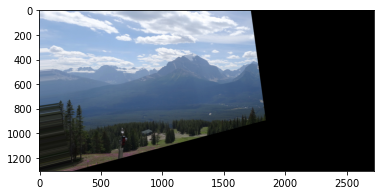

In [120]:
plt.imshow(compute_backward_mapping5.astype('int'))

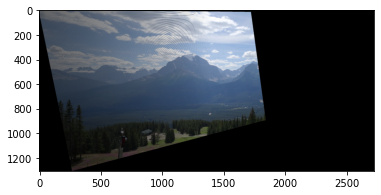

In [119]:
plt.imshow(compute_mapping.astype('int'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


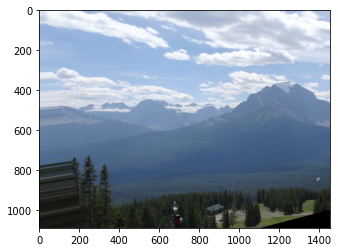

In [51]:
plt.imshow(compute_backward_mapping3.astype('int'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


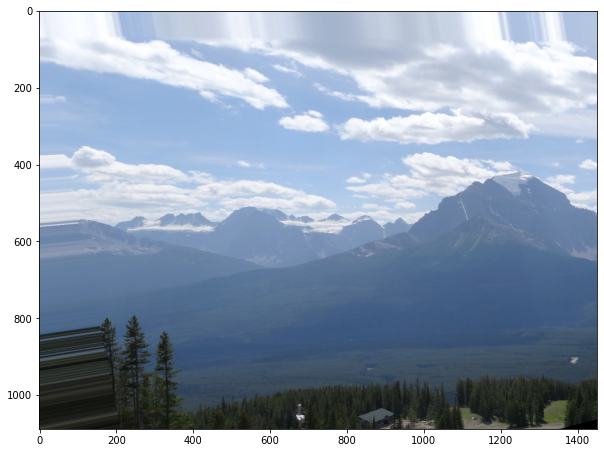

In [52]:
plt.figure(figsize = (10,10))
plt.imshow(compute_backward_mapping2.astype('int'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


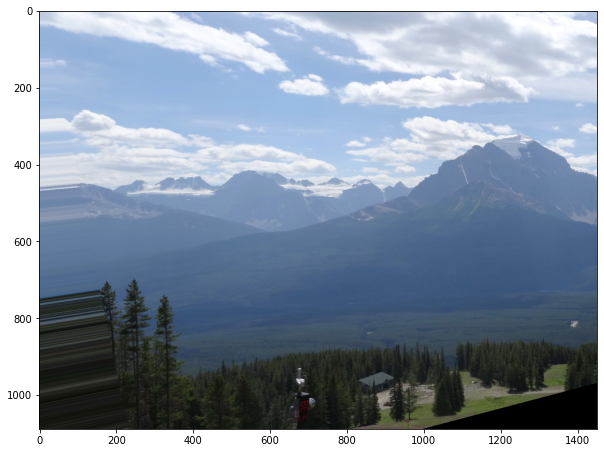

In [55]:
plt.figure(figsize = (10,10))
plt.imshow(compute_backward_mapping4.astype('int'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


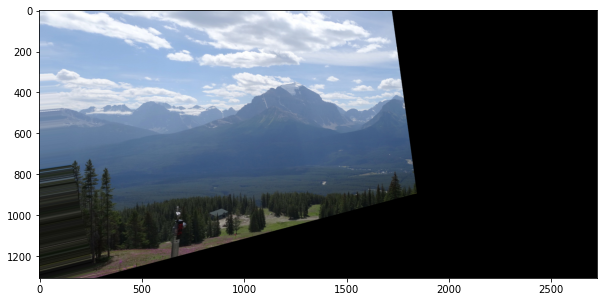

In [75]:
plt.figure(figsize = (10,10))
plt.imshow(compute_backward_mapping4.astype('int'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


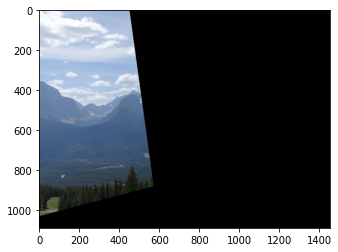

In [46]:
plt.imshow(compute_backward_mapping.astype('int'))

In [ ]:
plt.imshow(dst_img.astype('int'))

In [ ]:
padding

In [35]:
empty_pano = np.zeros((r,c,3))

In [67]:
compute_backward_mapping4[padding.pad_up:empty_pano.shape[0]-padding.pad_down-1,padding.pad_left:empty_pano.shape[1]-padding.pad_right]= dst_img

In [167]:
empty_pano=int_im

In [168]:
empty_pano[padding.pad_up:empty_pano.shape[0]-padding.pad_down-1,padding.pad_left:empty_pano.shape[1]-padding.pad_right]= dst_img

In [37]:
empty_pano.shape[0]

1306

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


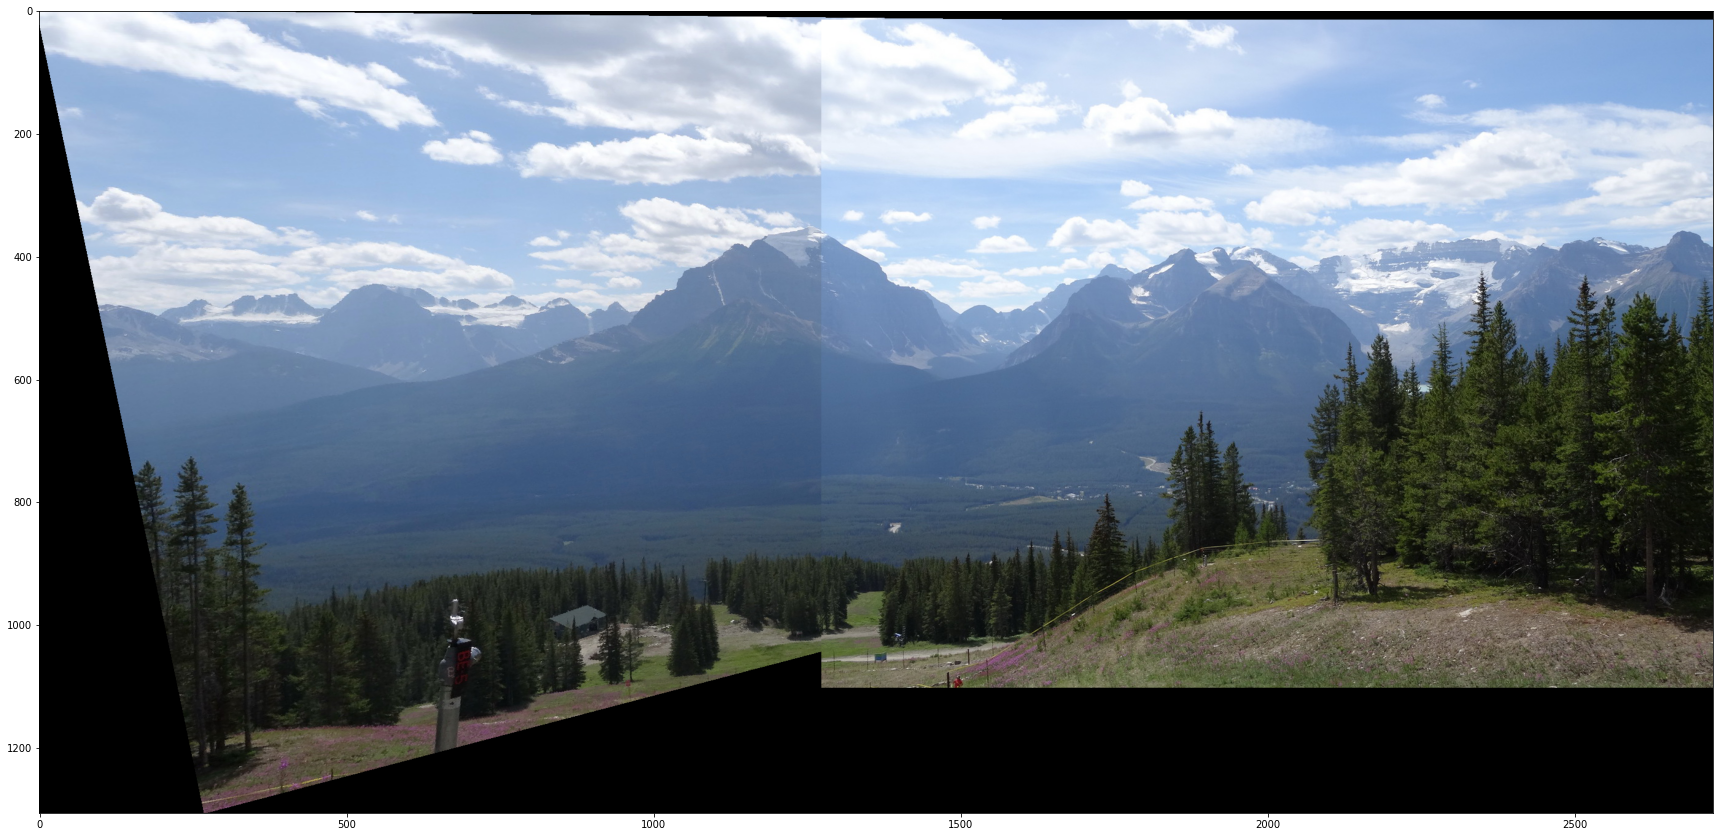

In [170]:
plt.figure(figsize = (30,30))

plt.imshow((empty_pano).astype('int'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


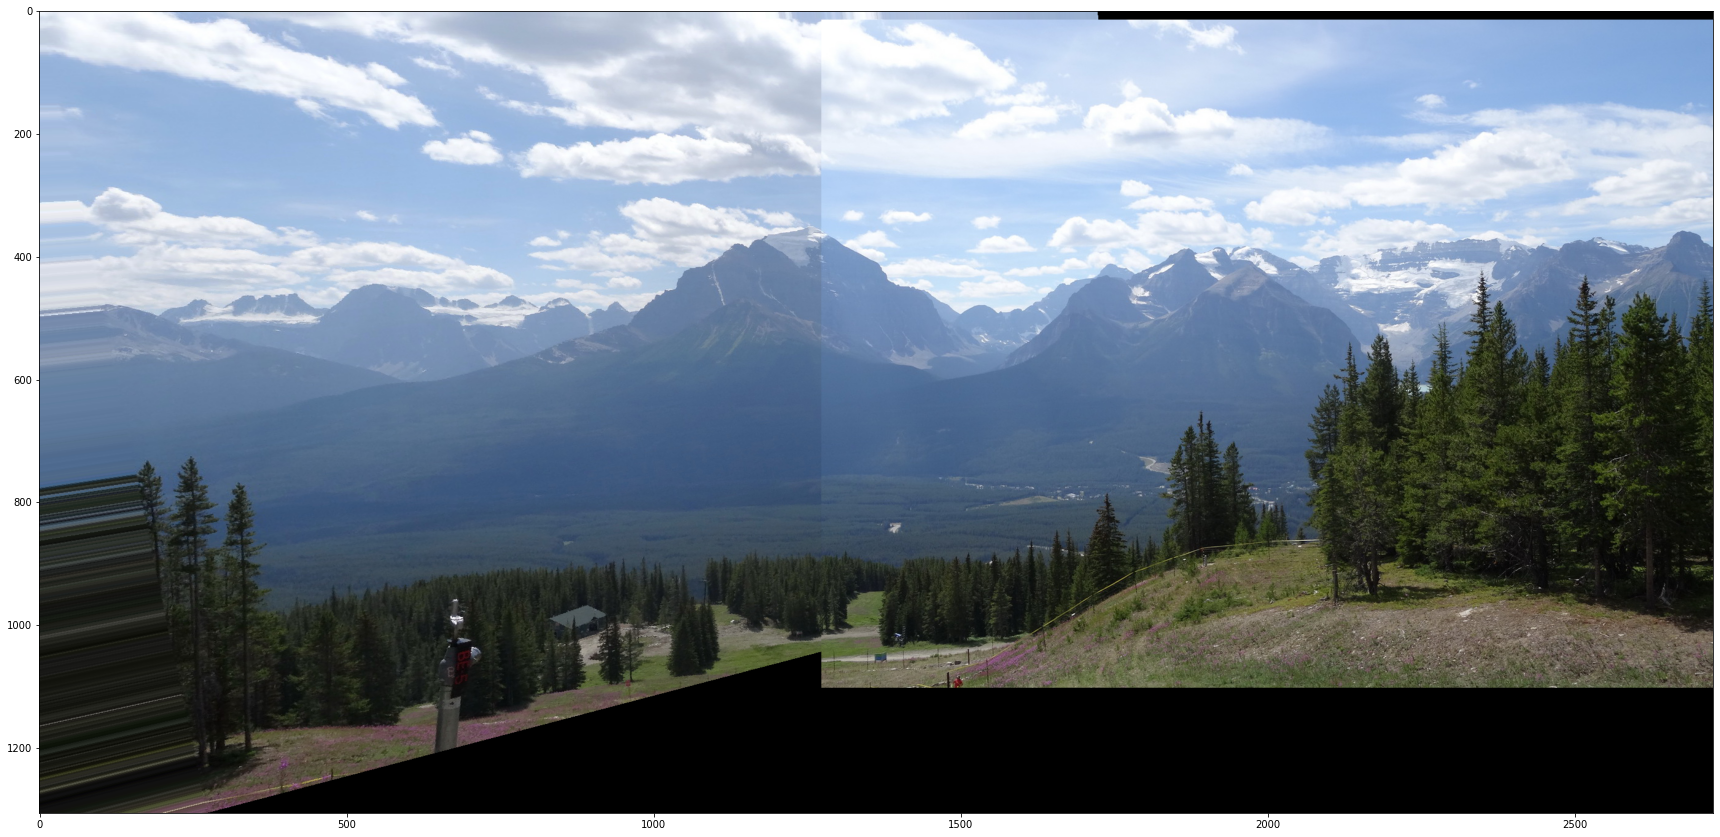

In [72]:
plt.figure(figsize = (30,30))

plt.imshow((compute_backward_mapping4).astype('int'))


In [ ]:
empty_pano[padding.pad_down:-padding.pad_up,padding.pad_left:empty_pano.shape[1]-padding.pad_right].shape

In [ ]:
padding.pad_right

In [ ]:
padding.pad_left

In [ ]:
empty_pano.shape

In [ ]:
plt.imshow(empty_pano.astype('int'))

In [ ]:
empty_pano.shape

In [ ]:
dst_img.shape

In [ ]:
src_img.shape

In [202]:
def forward_mapping(H, src):
    """ Input : A homography matrix 3*3, src points to transfer as a 3*n array
        output: dst points as a 3*n array"""
    pts_hom = np.vstack([src, np.ones(src.shape[1])])
    f_map = H @ pts_hom
    f_map = f_map / f_map[2,:]
    return f_map
def get_corner_indx(src_img_np, H):
    rows, cols, _ = src_img_np.shape
    cor_src = np.zeros((2,4))
    cor_src[:, 0] = np.array([0,0]).T
    cor_src[:, 1] = np.array([0,rows]).T
    cor_src[:, 2] = np.array([cols,0]).T
    cor_src[:, 3] = np.array([cols,rows]).T
    corners = forward_mapping(H, cor_src)
    xmin = math.floor(min(corners[0,:]))
    xmax = math.ceil(max(corners[0, :]))
    ymin = math.floor(min(corners[1, :]))
    ymax = math.ceil(max(corners[1, :]))
    return xmin, xmax, ymin, ymax
def bilinear(x, y, src_img):
    f01 = src_img[math.ceil(y) ,math.floor(x)]
    f00 = src_img[ math.floor(y) ,math.floor(x)]
    f11 = src_img[math.ceil(y) , math.ceil(x)]
    f10 = src_img[math.floor(y), math.ceil(x) ]
    ret = np.zeros(3)
    for i in range(3):
        a = x[0] - math.floor(x)
        b = math.ceil(y) - y
        col_vec = np.array([1 - a, a])
        row_vec =  np.array([1 - b, b])
        Matrix = np.array([[f00[i], f01[i]], [f10[i], f11[i]]])
        ret[i] = col_vec @ Matrix @ row_vec
    return ret
def Backward_Mapping(H,src_img):
    """forward mapping to src image"""
    src_img_np = np.asarray(src_img)
    rows,cols, _ = src_img_np.shape
    x1, x2, y1, y2 = get_corner_indx(src_img_np,H)
    width = x2-x1
    hight = y2-y1
    back_map_img = np.uint8(np.zeros([hight, width, 3]))
    """backward mapping mat"""
    H_inv = np.linalg.inv(H)
    """backmap corners"""

    j = -1000
    for i in range(0, width):
        if (i %100 == 0):
            print('currently in width: {}/{} and height: {}/{} '.format(i, width, j, hight))
        for j in range(0 , hight):
            #print('currently in width: {}/{} and height: {}/{} '.format(i, width, j, hight))
            dest_p = np.array([i+x1, j+y1,1]).reshape((3, 1))
            back_map_p = np.dot(H_inv,dest_p)
            back_map_p = back_map_p[:2, :] / back_map_p[2, :]
            x = back_map_p[0]
            y = back_map_p[1]

            if x < 0 or x > cols - 1:
                continue
            if y < 0 or y > rows - 1:
                continue
            else:
                #pxl = bilinear(x, y, src_img)
                back_map_img[j, i, :] = bilinear(x, y, src_img)

    plt.figure()
    plt.imshow(back_map_img)
    #plt.show(block = False)
    return back_map_img

In [203]:
import math
src_img_np = np.asarray(src_img)
x1, x2, y1, y2 = get_corner_indx(src_img_np, h)
#orig_ind, target_ind = get_all_image_indices(H_ransac, img_src)

#target_ind = forward_mapping(H, orig_ind)

x_offset = np.abs(np.min([x1,x2,0])).astype(int)  # calculate the offset on x axis
y_offset = np.abs(np.min([y1,y2,0])).astype(int)  # calculate the offset on x axis


In [204]:
x_offset

1278

In [205]:
y_offset

17

In [206]:
dst_shp_y, dst_shp_x , __= dst_img.shape


currently in width: 0/1850 and height: -1000/1310 
currently in width: 100/1850 and height: 1309/1310 
currently in width: 200/1850 and height: 1309/1310 
currently in width: 300/1850 and height: 1309/1310 
currently in width: 400/1850 and height: 1309/1310 
currently in width: 500/1850 and height: 1309/1310 
currently in width: 600/1850 and height: 1309/1310 
currently in width: 700/1850 and height: 1309/1310 
currently in width: 800/1850 and height: 1309/1310 
currently in width: 900/1850 and height: 1309/1310 
currently in width: 1000/1850 and height: 1309/1310 
currently in width: 1100/1850 and height: 1309/1310 
currently in width: 1200/1850 and height: 1309/1310 
currently in width: 1300/1850 and height: 1309/1310 
currently in width: 1400/1850 and height: 1309/1310 
currently in width: 1500/1850 and height: 1309/1310 
currently in width: 1600/1850 and height: 1309/1310 
currently in width: 1700/1850 and height: 1309/1310 
currently in width: 1800/1850 and height: 1309/1310 


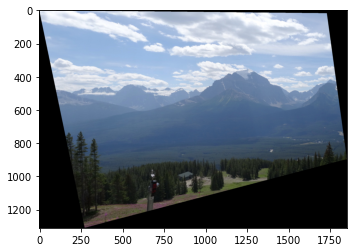

In [207]:

back_map_img = Backward_Mapping(h, src_img)
y_back_shp, x_back_shp, __ = back_map_img.shape



In [208]:
y_pan = np.max([dst_shp_y + y_offset, y_back_shp])
x_pan = np.max([dst_shp_x + x_offset, x_back_shp])
img_pan = np.zeros((y_pan, x_pan, 3))


In [ ]:
img_pan.shape

In [ ]:
empty_pano.shape

In [162]:
src_image= src_img
homography = translated_homography
dst_image_shape = (r,c,3)

In [274]:
    xv, yv = np.meshgrid(range(src_image.shape[1]), range(src_image.shape[0]), sparse=False, indexing='xy')
    grid= np.vstack([xv.flatten(),yv.flatten(),np.ones(src_image.shape[0]*src_image.shape[1])])
    dst_grid= np.dot(homography,grid)
    dst_grid = dst_grid/dst_grid[2,:]
    dst_grid = dst_grid.astype('int')
    dst_grid[0,:] = dst_grid[0,:].clip(min=0,max=dst_image_shape[1]-1)
    dst_grid[1,:] = dst_grid[1,:].clip(min=0,max=dst_image_shape[0]-1)
    grid = grid.reshape((3,src_image.shape[0],src_image.shape[1])).astype('int')
    dst_grid_r = dst_grid.reshape((3,src_image.shape[0],src_image.shape[1]))
    new_img = np.zeros(dst_image_shape)
    new_img[dst_grid_r[1],dst_grid_r[0]]= src_image[grid[1],grid[0]]

In [275]:
new_img.shape

(1306, 2726, 3)

In [270]:
dst_grid_r.shape

(3, 1306, 2726)

In [165]:
dst_grid_r[0]

array([[   0,    0,    0, ..., 1722, 1723, 1724],
       [   0,    0,    0, ..., 1722, 1723, 1724],
       [   0,    0,    1, ..., 1722, 1723, 1724],
       ...,
       [ 269,  271,  272, ..., 1843, 1843, 1844],
       [ 269,  271,  272, ..., 1843, 1844, 1844],
       [ 269,  271,  273, ..., 1843, 1844, 1844]])

In [172]:
xv_d


array([[   1,    1,    1, ...,    0,    0,    0],
       [   2,    2,    2, ...,    0,    0,    0],
       [   2,    2,    2, ...,    0,    0,    0],
       ...,
       [ 808,  808,  808, ..., 1087, 1087, 1087],
       [ 809,  809,  809, ..., 1087, 1087, 1087],
       [ 810,  810,  810, ..., 1087, 1087, 1087]])

In [166]:
new_img[0,-1]

array([0., 0., 0.])

In [167]:
new_img.shape

(1306, 2726, 3)

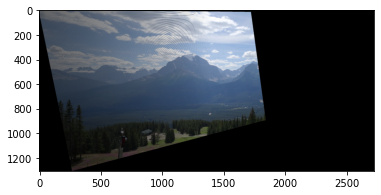

In [168]:
plt.imshow(new_img.astype('int'))

In [201]:
new_img[-1,0]

array([0., 0., 0.])